In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot 


In [34]:
def split_file_by_intervention(input_path, output_base_path):
    # Lire le fichier ligne par ligne et diviser en plusieurs fichiers
    with open(input_path, 'r', encoding='utf-8') as file:
        intervention_data = []
        file_counter = 1
        separator_line = 'Composition Initiale: esp:proportion'
        # Flag to start capturing data after the first separator is found
        start_capturing = False
        print("fichier enregustre")
        for line in file:
            if separator_line in line:
                if start_capturing and intervention_data:
                    # Save the current intervention data to a file
                    with open(f'{output_base_path}_intervention_{file_counter}.txt', 'w', encoding='utf-8') as out_file:
                        out_file.write(''.join(intervention_data))
                    file_counter += 1
                    intervention_data = []
                    #print("fichier enregustre")
                # Start capturing data after the first separator is found
                start_capturing = True
            if start_capturing:
                intervention_data.append(line)
                #print("fichier enregustre")

        # Save the last intervention data if any
        if intervention_data:
            with open(f'{output_base_path}_intervention_{file_counter}.txt', 'w', encoding='utf-8') as out_file:
                out_file.write(''.join(intervention_data))

# Path where to save the split files, using a base path and appending counter for each intervention
output_base_path = '/home/loubna/ca/data/forceps/BasicVersion/'
split_file_by_intervention("forceps.inv", output_base_path)
data= pd.read_csv("_intervention_3.txt",sep=';',skiprows=11, engine='python')
inv

fichier enregustre


,Espece,patch,tree,diametre,BasalArea,age
0,CBet,1,782,"2,51","0,00",4
1,CBet,1,863,"1,63","0,00",2
2,CBet,1,864,"1,63","0,00",2
3,CBet,1,857,"1,63","0,00",2
4,CBet,1,853,"1,63","0,00",2
...,...,...,...,...,...,...
13197,QPet,30,1025,"1,56","0,00",2
13198,QPet,30,865,"2,82","0,00",5
13199,QPet,30,871,"2,82","0,00",5
13200,QPet,30,874,"2,82","0,00",5


In [35]:
data.columns


Index([' Espece', ' patch', ' tree', 'diametre', 'BasalArea', 'age'], dtype='object')

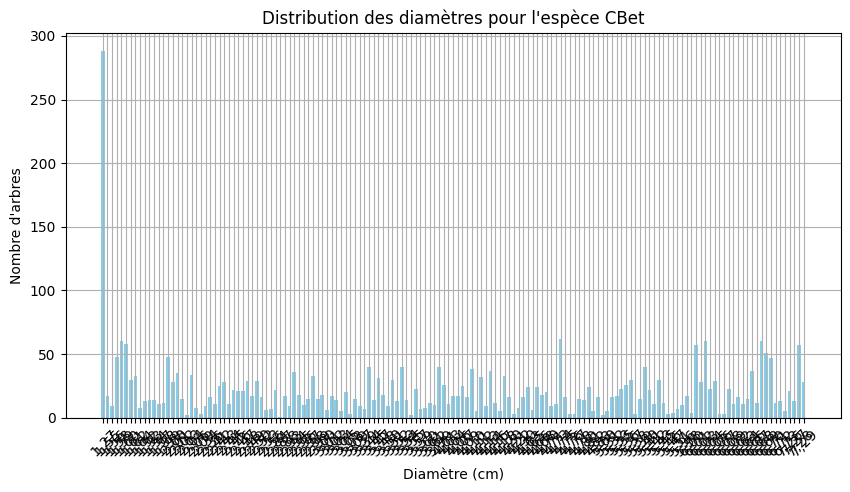

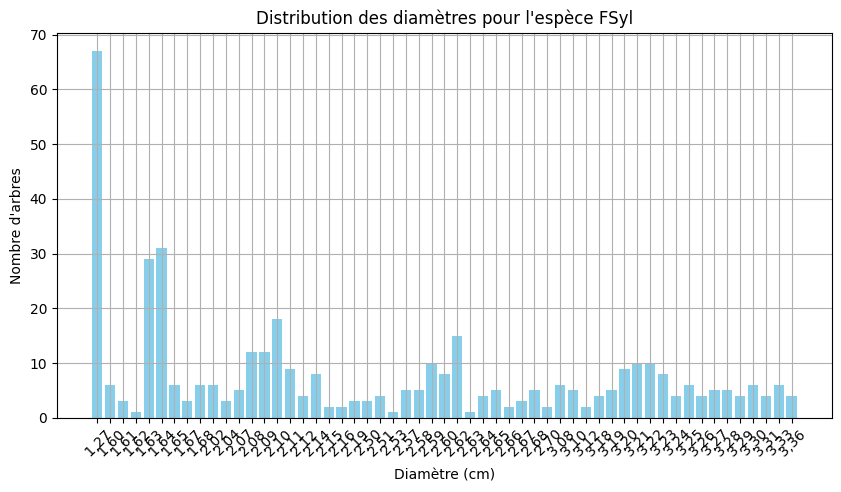

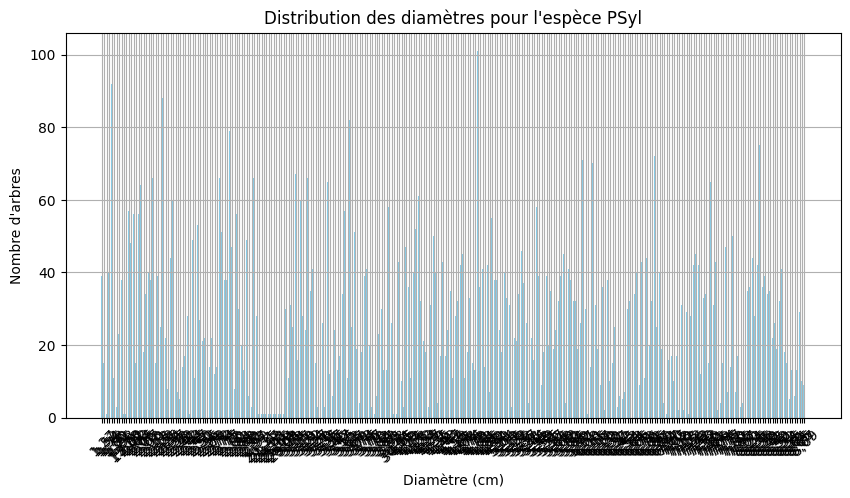

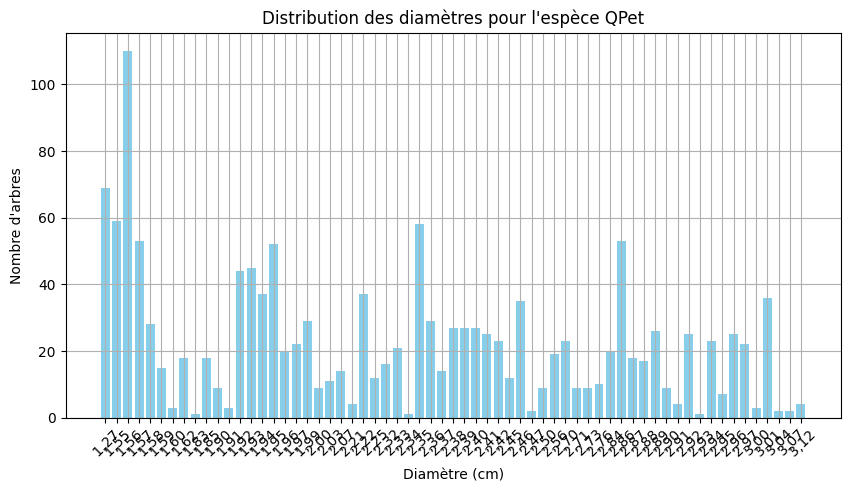

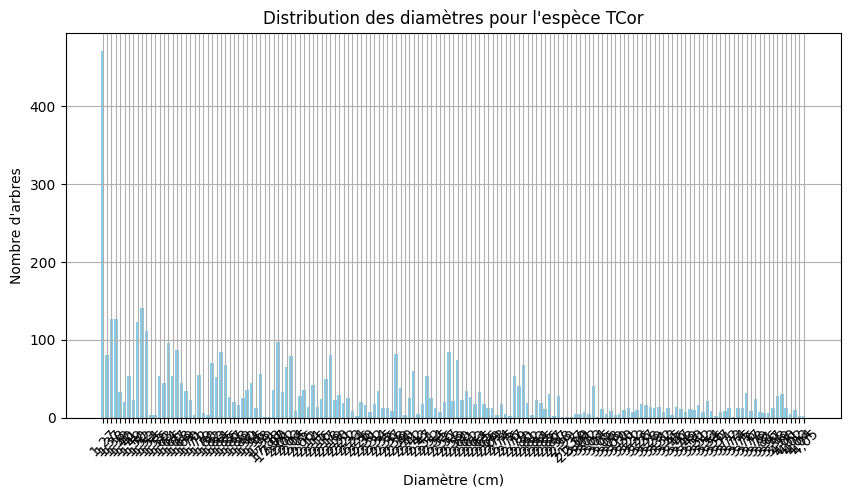

In [36]:
# Supprimer les espaces des noms des colonnes
data.columns = data.columns.str.strip()

# Regrouper par espèce et diamètre, puis compter le nombre d'occurrences
grouped_data = data.groupby(['Espece', 'diametre']).size().reset_index(name='count')

# Créer un graphique pour chaque espèce
for esp, group in grouped_data.groupby('Espece'):
    plt.figure(figsize=(10, 5))
    plt.bar(group['diametre'].astype(str), group['count'], color='skyblue')
    plt.xlabel('Diamètre (cm)')
    plt.ylabel('Nombre d\'arbres')
    plt.title(f'Distribution des diamètres pour l\'espèce {esp}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [7]:
import random
from itertools import product

def generate_strings(n, species, tp, theta, G_min, G_obj, composition):
    compositions = []
    # Generate n strings
    for _ in range(n):
        # Random selections
        chosen_theta = random.choice(theta)
        chosen_tp = random.choice(tp)
        chosen_G_obj = random.choice(G_obj)

        # Generate all combinations of the composition list repeated as many times as there are species
        combinaisons = list(product(composition, repeat=len(species)))
        # Filter combinations where the sum equals 100 (since composition elements are in percentages)
        combinaisons_valides = [comb for comb in combinaisons if sum(comb) == 100]
        
        # Randomly select a valid composition
        chosen_composition = random.choice(combinaisons_valides)

        # Creating the composition string
        composition_parts = [f"{s}-{chosen_composition[i]}" for i, s in enumerate(species)]
        composition_str = ",".join(composition_parts)

        # Form the final string
        final_string = f"{chosen_theta}_{G_min}_{chosen_tp}_{chosen_G_obj}_{composition_str};"
        compositions.append(final_string)

    return compositions

# Parameters
species = ["CBet", "FSyl", "Psyl", "TCor", "QPet"]
tp = [0, 0.5, 1]
theta = [5, 10, 15, 20]
G_min = 3
G_obj = ["50%", "60%", "70%", "80", "90%"]
composition = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Example: Generate 5 strings
n = 5
generated_strings = generate_strings(n, species, tp, theta, G_min, G_obj, composition)
generated_strings


['20_3_0_80_CBet-20,FSyl-30,Psyl-20,TCor-20,QPet-10;',
 '10_3_0_80_CBet-40,FSyl-0,Psyl-20,TCor-10,QPet-30;',
 '20_3_0.5_60%_CBet-30,FSyl-0,Psyl-20,TCor-0,QPet-50;',
 '5_3_1_80_CBet-10,FSyl-10,Psyl-80,TCor-0,QPet-0;',
 '10_3_1_90%_CBet-50,FSyl-30,Psyl-10,TCor-10,QPet-0;']

In [42]:
#Calculer la différence de composition pour chaque méthode et voir la différence  en moyenne la somme de difference divise par 5
#regarder la plus grand ecart entre chaque méthode 
#étudier ce cas 
# Attempt to read the file with a different delimiter and inspect the columns more appropriately
inv_forceps = pd.read_csv("output_Forceps", delimiter=';', header=None)
inv_loubna=pd.read_csv("output_log", delimiter=';', header=None)

# Clean and format the data for calculations
# Step 1: Correcting decimal separators and splitting species composition data

# Define a helper function to clean species composition data
def clean_composition(data_str):
    comps = data_str.strip().split(',')
    result = {}
    for comp in comps:
        species, percentage = comp.split('-')
        result[species.strip()] = float(percentage.strip().replace(',', '.'))
    return result

# cleaning data for forceps 
inv_forceps[0] = inv_forceps[0].apply(lambda x: float(x.replace(',', '.')))  # Initial Area
inv_forceps[1] = inv_forceps[1].apply(clean_composition)  # Target composition
inv_forceps[3] = inv_forceps[3].apply(lambda x: float(x.replace(',', '.')))  # Remaining Area after thinning
inv_forceps[4] = inv_forceps[4].apply(lambda x: float(x.replace(',', '.')))  # Target Area after thinning
#cleaning data for output loubna 
inv_loubna[0] = inv_loubna[0].apply(lambda x: float(x.replace(',', '.')))  # Initial Area
inv_loubna[1] = inv_loubna[1].apply(clean_composition)  # Target composition
inv_loubna[3] = inv_loubna[3].apply(lambda x: float(x.replace(',', '.')))  # Remaining Area after thinning
inv_loubna[4] = inv_loubna[4].apply(lambda x: float(x.replace(',', '.')))  # Target Area after thinning

# Clean percentage compositions in columns 5 and 6
def clean_percentage_composition(comp_str):
    comps = comp_str.split('%')
    result = {}
    for comp in comps[:-1]:  # last split is empty
        key_val = comp.split(':')
        result[key_val[0].strip()] = float(key_val[1].strip())
    return result
#forceps data 
inv_forceps[5] = inv_forceps[5].apply(clean_percentage_composition)  # Remaining composition after thinning
inv_forceps[6] = inv_forceps[6].apply(clean_percentage_composition)  # Initial composition
#loubna data 
inv_loubna[5] = inv_loubna[5].apply(clean_percentage_composition)  # Remaining composition after thinning
inv_loubna[6] = inv_loubna[6].apply(clean_percentage_composition)  # Initial composition
# Calculate the difference between target and remaining composition for each species and then average the differences

# Define a function to calculate differences and their average
def calculate_mean_difference(target_comps, remaining_comps):
    differences = []
    for species in target_comps:
        if species in remaining_comps:
            diff = abs(target_comps[species] - remaining_comps[species])
        else:
            diff = target_comps[species]  # If species is not in remaining, take full target as difference
        differences.append(diff)
    return sum(differences) / len(differences) if differences else 0

# Apply the function to each row
#forceps data 
inv_forceps['mean_diff_init_rest'] = inv_forceps.apply(lambda row: calculate_mean_difference(row[5], row[6]), axis=1)
inv_forceps['mean_diff_cible_rest'] = inv_forceps.apply(lambda row: calculate_mean_difference(row[1], row[5]), axis=1)

#loubna data 
inv_loubna['mean_diff_init_rest'] = inv_loubna.apply(lambda row: calculate_mean_difference(row[5], row[6]), axis=1)
inv_loubna['mean_diff_cible_rest'] = inv_loubna.apply(lambda row: calculate_mean_difference(row[1], row[5]), axis=1)
print("Forceps")
print("init_rest:",inv_forceps[['mean_diff_init_rest']].head())
print("cible_rest:",inv_forceps[['mean_diff_cible_rest']].head())
print("loubna")
print("init_rest:",inv_loubna[['mean_diff_init_rest']].head())
print("cible_rest:",inv_loubna[['mean_diff_cible_rest']].head())



Forceps
init_rest:    mean_diff_init_rest
0             3.118946
1            21.006671
2             9.474423
3             3.152222
4             9.943944
cible_rest:    mean_diff_cible_rest
0              0.514220
1              9.188290
2              0.099300
3             25.983037
4              6.228253
loubna
init_rest:    mean_diff_init_rest
0             2.565124
1            21.247981
2             9.519707
3             3.910106
4            11.840542
cible_rest:    mean_diff_cible_rest
0              0.039602
1              9.026010
2              0.081560
3             25.276151
4              3.901800


In [30]:
#Calculer la différence de composition pour chaque méthode et voir la différence  en moyenne la somme de difference divise par 5
#regarder la plus grand ecart entre chaque méthode 
#étudier ce cas 
# Attempt to read the file with a different delimiter and inspect the columns more appropriately
inv_forceps = pd.read_csv("output_Forceps", delimiter=';', header=None)
inv_loubna=pd.read_csv("output_log", delimiter=';', header=None)

# Clean and format the data for calculations
# Step 1: Correcting decimal separators and splitting species composition data

# Define a helper function to clean species composition data
def clean_composition(data_str):
    comps = data_str.strip().split(',')
    result = {}
    for comp in comps:
        species, percentage = comp.split('-')
        result[species.strip()] = float(percentage.strip().replace(',', '.'))
    return result

# cleaning data for forceps 
inv_forceps[0] = inv_forceps[0].apply(lambda x: float(x.replace(',', '.')))  # Initial Area
inv_forceps[1] = inv_forceps[1].apply(clean_composition)  # Target composition
inv_forceps[3] = inv_forceps[3].apply(lambda x: float(x.replace(',', '.')))  # Remaining Area after thinning
inv_forceps[4] = inv_forceps[4].apply(lambda x: float(x.replace(',', '.')))  # Target Area after thinning
#cleaning data for output loubna 
inv_loubna[0] = inv_loubna[0].apply(lambda x: float(x.replace(',', '.')))  # Initial Area
inv_loubna[1] = inv_loubna[1].apply(clean_composition)  # Target composition
inv_loubna[3] = inv_loubna[3].apply(lambda x: float(x.replace(',', '.')))  # Remaining Area after thinning
inv_loubna[4] = inv_loubna[4].apply(lambda x: float(x.replace(',', '.')))  # Target Area after thinning

# Clean percentage compositions in columns 5 and 6
def clean_percentage_composition(comp_str):
    comps = comp_str.split('%')
    result = {}
    for comp in comps[:-1]:  # last split is empty
        key_val = comp.split(':')
        result[key_val[0].strip()] = float(key_val[1].strip())
    return result
#forceps data 
inv_forceps[5] = inv_forceps[5].apply(clean_percentage_composition)  # Remaining composition after thinning
inv_forceps[6] = inv_forceps[6].apply(clean_percentage_composition)  # Initial composition
#loubna data 
inv_loubna[5] = inv_loubna[5].apply(clean_percentage_composition)  # Remaining composition after thinning
inv_loubna[6] = inv_loubna[6].apply(clean_percentage_composition)  # Initial composition
# Calculate the difference between target and remaining composition for each species and then average the differences

# Define a function to calculate differences and their average
def calculate_mean_difference(target_comps, remaining_comps):
    differences = []
    for species in target_comps:
        if species in remaining_comps:
            diff = abs(target_comps[species] - remaining_comps[species])
        else:
            diff = target_comps[species]  # If species is not in remaining, take full target as difference
        differences.append(diff)
    return sum(differences) / len(differences) if differences else 0

# Apply the function to each row
#forceps data 
inv_forceps['mean_diff_init_rest'] = inv_forceps.apply(lambda row: calculate_mean_difference(row[5], row[6]), axis=1)
inv_forceps['mean_diff_cible_rest'] = inv_forceps.apply(lambda row: calculate_mean_difference(row[1], row[5]), axis=1)

#loubna data 
inv_loubna['mean_diff_init_rest'] = inv_loubna.apply(lambda row: calculate_mean_difference(row[5], row[6]), axis=1)
inv_loubna['mean_diff_cible_rest'] = inv_loubna.apply(lambda row: calculate_mean_difference(row[1], row[5]), axis=1)
print("Forceps")
print("init_rest:",inv_forceps[['mean_diff_init_rest']].head())
print("cible_rest:",inv_forceps[['mean_diff_cible_rest']].head())
print("loubna")
print("init_rest:",inv_loubna[['mean_diff_init_rest']].head())
print("cible_rest:",inv_loubna[['mean_diff_cible_rest']].head())



Forceps
init_rest:    mean_diff_init_rest
0             2.078892
1            23.681168
2             7.899185
3             5.146793
4            16.906178
cible_rest:    mean_diff_cible_rest
0              0.525834
1              6.689425
2              0.132648
3             21.889171
4              3.225057
loubna
init_rest:    mean_diff_init_rest
0             2.267572
1            15.848356
2             8.169807
3             2.756508
4             6.882225
cible_rest:    mean_diff_cible_rest
0              0.337154
1             13.456478
2              4.942801
3             22.876716
4             11.117905


In [3]:

df1 = pd.read_csv("./output-cmd_sansgestion_50_climRCP8.5_test.txt/forceps.climate.Bern_forceps.inv_simulation_1complete.txt",sep='\t',skiprows=8, engine='python')
df2=pd.read_csv("./output-cmd_sansgestion_50_climRCP8.5_test.txt/forceps.climate.Bern_forceps.inv_simulation_1mean.txt",sep='\t',skiprows=1,skipinitialspace=True)
df3=pd.read_csv("./output-cmd_sansgestion_50_climRCP8.5_test.txt/forceps.climate.Bern_forceps.inv_simulation_1productivityScene.txt",sep='\t',skiprows=8,skipinitialspace=True)

In [4]:
df1

,#date,patchId,id,speciesId,speciesShortName,genotypeName,age,dbh(cm),height(m),volume(m3),...,foliageArea,LAI,lightAvailability,algf,treeDroughtIndex,droughtIndexModifier,basalArea(m2),biomass(kg),x,y
0,1960,1,10000002,17,FSyl,17-Genotype-1,59,17.7431,13.1466,0.1309,...,64.3743,11.3278,0.0589,0.0404,0.0001,1,0.024726,144.677460,8.8600,62.0202
1,1960,1,10000003,0,AAlb,0-Genotype-1,51,22.9111,15.8456,0.2554,...,132.8114,10.4811,0.0728,0.1003,0.0001,1,0.041227,243.893505,8.8600,62.0202
2,1960,1,10000004,0,AAlb,0-Genotype-1,57,32.4096,20.4997,0.6391,...,261.5266,7.8165,0.1417,0.3465,0.0001,1,0.082497,557.051124,8.8600,62.0202
3,1960,1,10000005,17,FSyl,17-Genotype-1,82,15.7389,11.9740,0.0954,...,46.1852,11.6558,0.0543,0.0196,0.0001,1,0.019455,107.416144,8.8600,62.0202
4,1960,1,10000012,0,AAlb,0-Genotype-1,44,25.3786,17.1209,0.3349,...,166.6357,9.5670,0.0915,0.1750,0.0001,1,0.050585,311.883924,8.8600,62.0202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205653,2154,15,150000599,0,AAlb,0-Genotype-1,6,1.6336,2.5799,0.0004,...,1.4949,11.6297,0.0546,0.0212,0.0000,1,0.000210,0.765060,44.3001,8.8600
205654,2154,15,150000600,0,AAlb,0-Genotype-1,5,1.5425,2.5133,0.0003,...,1.3682,11.6341,0.0546,0.0209,0.0000,1,0.000187,0.671003,44.3001,8.8600
205655,2154,15,150000601,0,AAlb,0-Genotype-1,3,1.3878,2.3998,0.0003,...,1.1624,11.6418,0.0545,0.0204,0.0000,1,0.000151,0.527428,44.3001,8.8600
205656,2154,15,150000607,0,AAlb,0-Genotype-1,1,1.2700,2.3132,0.0002,...,4.5513,11.6888,0.0538,0.0175,0.0000,0,0.000127,1.193209,44.3001,8.8600


# Tracer_B,G,DB,SB

# Tracer_G(surface terrière)

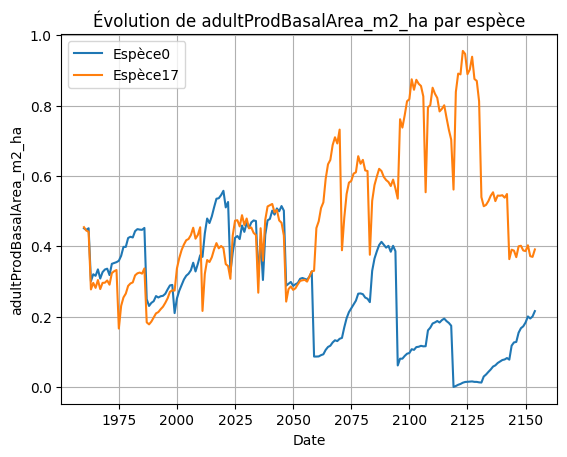

In [5]:
sps=df3["speciesId"].unique()
attributs_name3=df3.columns.to_list()
for sp in sps:
    data_sp=df3[df3["speciesId"]==sp]
    plot(data_sp["#date"],data_sp["adultProdBasalArea_m2_ha"],label=f'Espèce{sp}')
    plt.grid(True)

plt.grid(True)
plt.legend()
plt.xlabel('Date')
plt.ylabel("adultProdBasalArea_m2_ha")
plt.title(f'Évolution de adultProdBasalArea_m2_ha par espèce')
plt.show()

# Tracer_B(biomasse en t/ha)

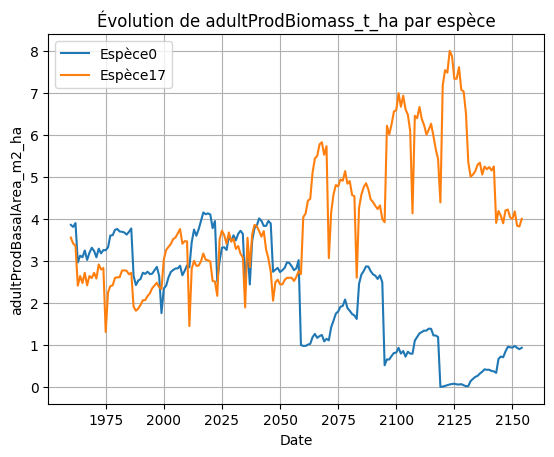

In [6]:
for sp in sps:
    data_sp=df3[df3["speciesId"]==sp]
    plot(data_sp["#date"],data_sp["adultProdBiomass_t_ha"],label=f'Espèce{sp}')
    plt.grid(True)

plt.grid(True)
plt.legend()
plt.xlabel('Date')
plt.ylabel("adultProdBasalArea_m2_ha")
plt.title(f'Évolution de adultProdBiomass_t_ha par espèce')
plt.show()


# Tracer_taux_de_mortalité

/tmp/ipykernel_83135/2406120238.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_data_cleaned = new_data_cleaned.apply(pd.to_numeric, errors='ignore')


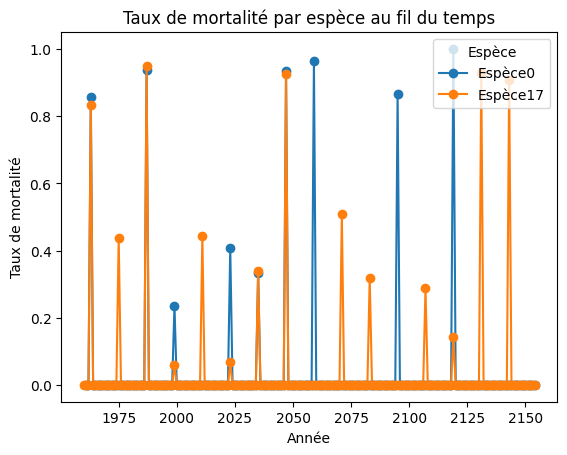

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
new_data = df3

new_data_cleaned = new_data.drop(0)

# Convertir les types de données pour les colonnes numériques
new_data_cleaned = new_data_cleaned.apply(pd.to_numeric, errors='ignore')



# Taux de mortalité = deadNumber / (deadNumber + adultTreeNumber) =>il faut le faire durant 5 ans d'intervention
new_data_cleaned['mortality_rate'] = new_data_cleaned['deadNumber'] / (new_data_cleaned['deadNumber'] + new_data_cleaned['adultTreeNumber'])


# Créer un lineplot du taux de mortalité pour chaque espèce au fil du temps
#sns.lineplot(data=new_data_cleaned, x="#date", y="mortality_rate", hue="speciesShortName", marker="o")
for sp in sps :
    data_sp=new_data_cleaned[new_data_cleaned["speciesId"]==sp]
    plot(data_sp["#date"],data_sp["mortality_rate"],label=f'Espèce{sp}',marker="o")
# Ajouter des titres et des labels
plt.title('Taux de mortalité par espèce au fil du temps')
plt.xlabel('Année')
plt.ylabel('Taux de mortalité')
plt.legend(title='Espèce', loc='upper right')

# Afficher le graphique
plt.show()



# Tracer le nombre d'espéce qu'on a chaque année 

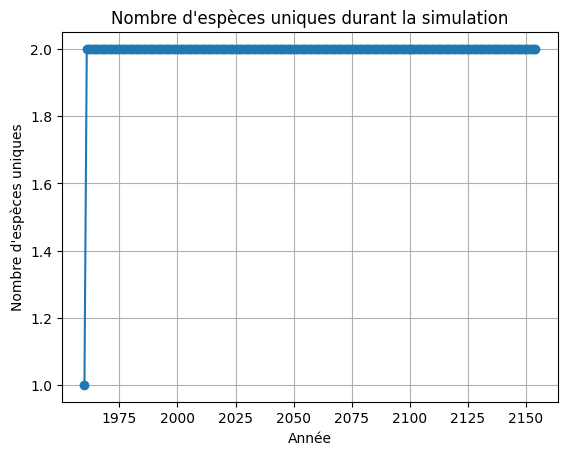

In [8]:
# Etape 1 : Calculer le nombre d'espèces uniques par année
species_per_year = new_data_cleaned.groupby('#date')['speciesShortName'].nunique().reset_index(name='unique_species')

plt.plot(species_per_year['#date'], species_per_year['unique_species'], marker='o')
plt.title('Nombre d\'espèces uniques durant la simulation')
plt.xlabel('Année')
plt.ylabel('Nombre d\'espèces uniques')
plt.grid(True)
plt.show()


# Tracer le coefficient du Gini(diversité structurelle)

In [9]:
import numpy as np

def gini_coefficient_optimized(array):
    """Calcul du coefficient de Gini pour une distribution donnée en utilisant une approche plus efficace sans créer de matrice complète."""
    # Assurez-vous que l'entrée est un numpy array.
    array = np.array(array, dtype=np.float64)
    if array.size == 0:
        return 0.0
    # Trier le tableau
    array_sorted = np.sort(array)
    # Calculer la somme cumulée des positions des valeurs triées
    cum_pos = np.cumsum(array_sorted)
    # Somme des valeurs de l'array
    total = array.sum()
    # Calcul du Gini en utilisant la somme cumulée
    gini = (2 * np.sum((np.arange(1, array.size + 1) * array_sorted)) - (array.size + 1) * total) / (array.size * total)
    # Normalisation pour les cas où total peut être zéro
    if total == 0:
        return 0.0
    else:
        return gini

# Exemple d'utilisation:
diametres = df1['dbh(cm)'].dropna().values
print("il faut que Gini soit dans [0.25;0.75 ] pour qu'on arrive à une divérsité structurelle")
print(gini_coefficient_optimized(diametres))


il faut que Gini soit dans [0.25;0.75 ] pour qu'on arrive à une divérsité structurelle
0.5880285893690943


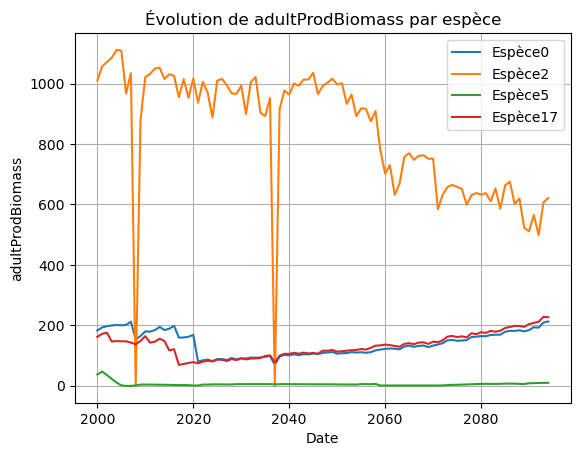

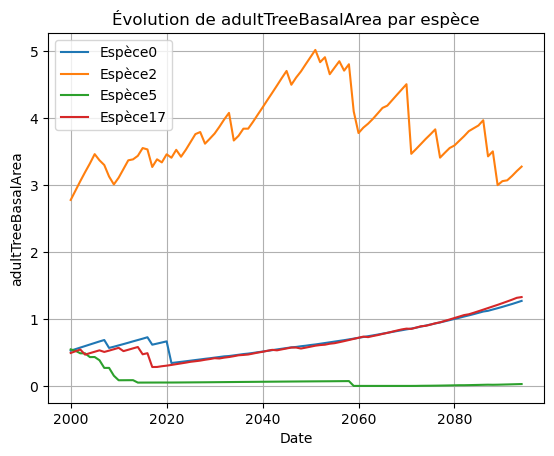

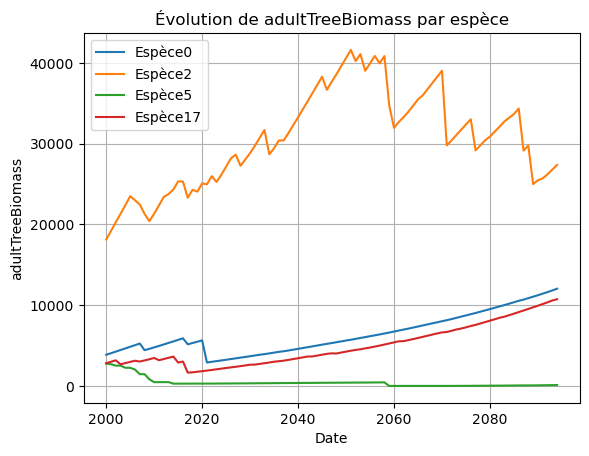

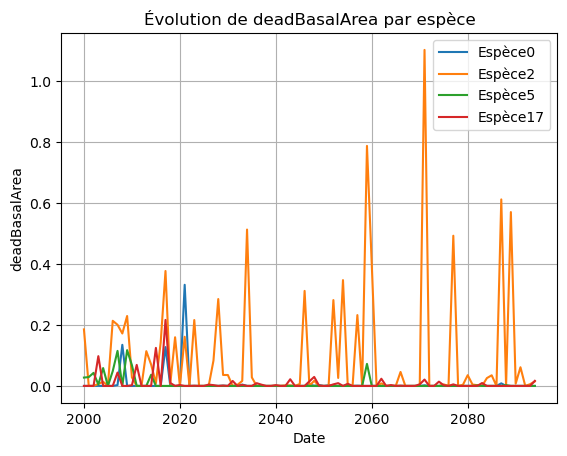

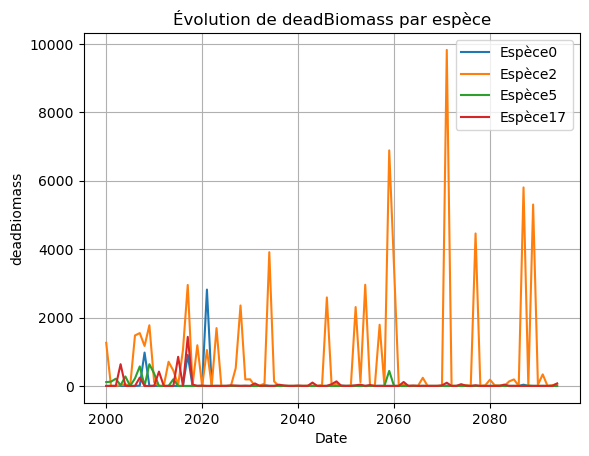

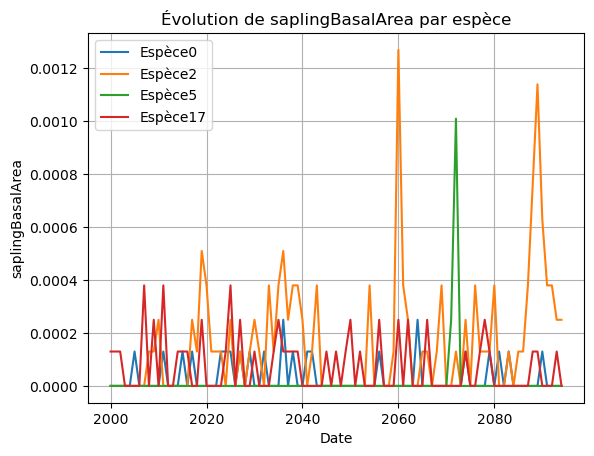

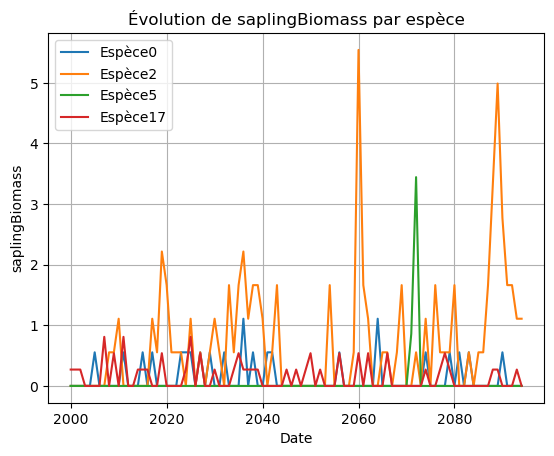

In [19]:
sps=df3["speciesId"].unique()
attributs_name3=df3.columns.to_list()
for x in attributs_name3[4:11]:
    for sp in sps:
        data_sp=df3[df3["speciesId"]==sp]
        plot(data_sp["#date"],data_sp[x],label=f'Espèce{sp}')
        plt.grid(True)

    plt.grid(True)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.title(f'Évolution de {x} par espèce')

    plt.show()




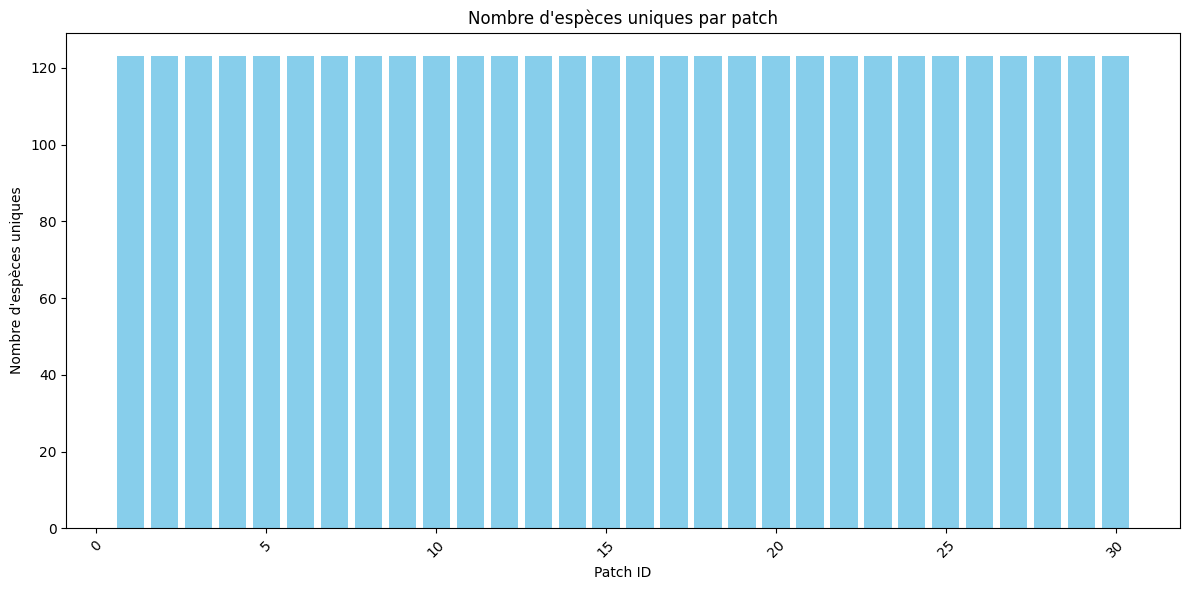

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(inv['#patchId'], inv['treeId'], color='skyblue')
plt.title('Nombre d\'espèces uniques par patch')
plt.xlabel('Patch ID')
plt.ylabel('Nombre d\'espèces uniques')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [16]:
sp= inv.groupby('#patchId')['treeId'].nunique()
sp

#patchId
1     123
2     123
3     123
4     123
5     123
6     123
7     123
8     123
9     123
10    123
11    123
12    123
13    123
14    123
15    123
16    123
17    123
18    123
19    123
20    123
21    123
22    123
23    123
24    123
25    123
26    123
27    123
28    123
29    123
30    123
Name: treeId, dtype: int64

In [3]:
df3

,#date,speciesId,speciesShortName,adultProdBasalArea,adultProdBiomass,adultTreeBasalArea,adultTreeBiomass,deadBasalArea,deadBiomass,saplingBasalArea,...,saplingNumber_ha,allTreesMean_la,allTreesMean_drtol,allTreesMean_g,reproducerTreesMean_la,reproducerTreesMean_drtol,reproducerTreesMean_g,deadTreesMean_la,deadTreesMean_drtol,deadTreesMean_g
0,2000,0,AAlb,0.02171,182.44469,0.52694,3860.54975,0.00000,0.00000,0.00000,...,0.00000,1,0.23,350,-1,-1,-1,-1,-1.00,-1
1,2000,2,PAbi,0.13511,1011.19531,2.77901,18131.85363,0.18556,1260.97586,0.00000,...,0.00000,5,0.11,355,-1,-1,-1,5,0.11,355
2,2000,5,PSyl,0.00629,36.52681,0.54593,2762.82458,0.02741,111.81175,0.00000,...,0.00000,9,0.37,150,-1,-1,-1,9,0.37,150
3,2000,17,FSyl,0.02410,161.09475,0.49257,2822.75437,0.00000,0.00000,0.00013,...,4.16667,1,0.25,260,-1,-1,-1,-1,-1.00,-1
4,2001,0,AAlb,0.02276,192.30624,0.54970,4052.85600,0.00000,0.00000,0.00000,...,0.00000,1,0.23,350,-1,-1,-1,-1,-1.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2093,17,FSyl,0.02071,148.62238,0.80903,6117.62990,0.00000,0.00000,0.00000,...,0.00000,1,0.25,260,-1,-1,-1,-1,-1.00,-1
376,2094,0,AAlb,0.01255,128.35891,1.00343,10162.51394,0.00000,0.00000,0.00000,...,0.00000,1,0.23,350,-1,-1,-1,-1,-1.00,-1
377,2094,2,PAbi,0.04971,494.10119,3.42924,32882.32226,0.00000,0.00000,0.00013,...,4.16667,5,0.11,355,-1,-1,-1,-1,-1.00,-1
378,2094,5,PSyl,0.00268,9.12559,0.01201,39.98374,0.00000,0.00000,0.00038,...,12.50000,9,0.37,150,-1,-1,-1,-1,-1.00,-1


# Number_mort_sapling_dead

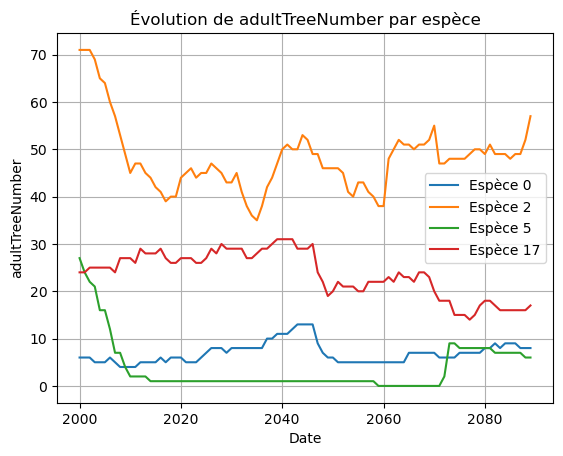

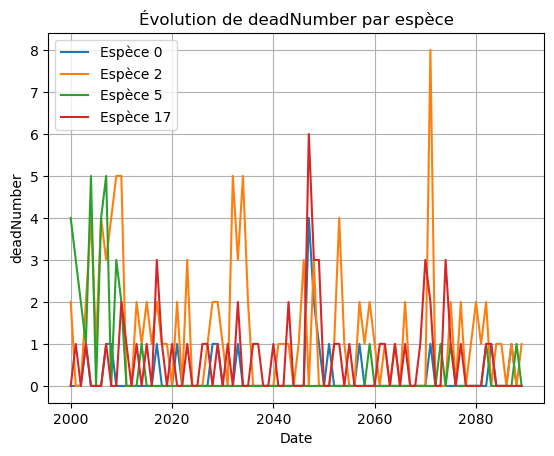

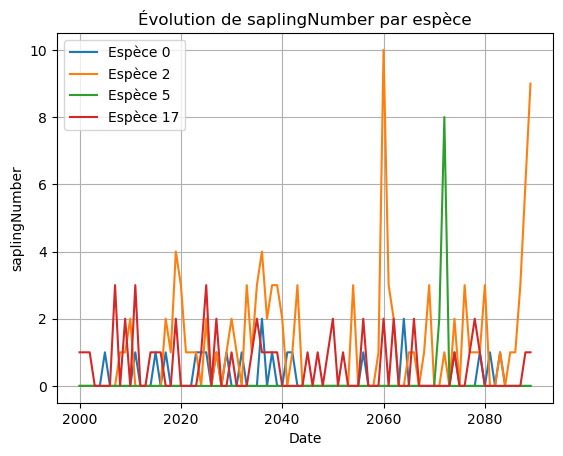

In [20]:

sps = df3["speciesId"].unique()
attributs_name3 = df3.columns.to_list()

for x in attributs_name3[11:14]:
    plt.figure()  # Créer une nouvelle figure pour chaque attribut
    for sp in sps:
        # Filtrer les données pour l'espèce et les dates inférieures à 2024
        data_sp = df3[(df3["speciesId"] == sp) & (df3["#date"] < 2090)]
        # Tracer les données de l'espèce actuelle si elle contient des données
        if not data_sp.empty:
            plt.plot(data_sp["#date"], data_sp[x], label=f'Espèce {sp}')
            plt.grid(True)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.title(f'Évolution de {x} par espèce')
    plt.show() 


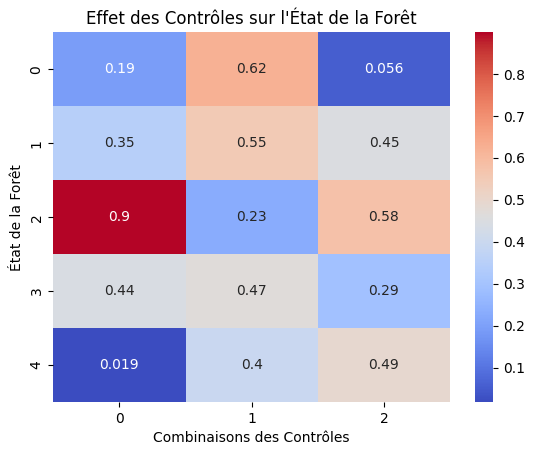

[[[[1.02224077e-01 8.51576457e-01 9.37062516e-01 3.28293616e-01]
   [8.52398348e-01 2.57194658e-01 6.86855058e-01 6.16588367e-01]
   [5.07388660e-01 3.08824058e-01 8.37088237e-01 5.28730145e-01]]

  [[8.63827927e-01 6.40164260e-01 1.21625910e-01 9.46405362e-01]
   [1.69460959e-01 3.26968702e-02 6.33761478e-01 8.22934939e-01]
   [3.16465571e-01 1.49282709e-01 9.86182189e-01 4.08935423e-01]]]


 [[[7.77898456e-01 9.03433525e-01 4.91200996e-01 7.49332538e-01]
   [1.18710732e-01 1.95691591e-01 2.11497030e-01 3.34413912e-01]
   [4.61090995e-01 5.64915304e-01 1.31211644e-01 7.52543036e-01]]

  [[3.53976009e-01 8.95556928e-02 3.63251248e-01 8.05516099e-01]
   [5.73588058e-01 8.91455985e-01 3.60615671e-01 8.82116998e-01]
   [8.10610557e-01 2.73471696e-01 1.14168065e-01 9.62091008e-01]]]


 [[[3.62922403e-01 4.23485176e-01 3.25245181e-01 7.22004223e-01]
   [5.36842626e-02 4.17963633e-01 1.31990181e-02 5.49940394e-01]
   [5.46235484e-01 1.84927971e-04 6.93932197e-01 3.02641692e-01]]

  [[2.91452

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que data[:, 0, :, 0] représente une coupe de nos données 4D pour un indicateur de viabilité et un type de climat
heatmap_data = np.random.rand(5, 3)  # Simuler une coupe de données

# Création d'une heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Effet des Contrôles sur l\'État de la Forêt')
plt.xlabel('Combinaisons des Contrôles')
plt.ylabel('État de la Forêt')
plt.show()
data = np.random.rand(5, 2, 3, 4)  # Utilisation de valeurs aléatoires pour l'exemple

print(data)

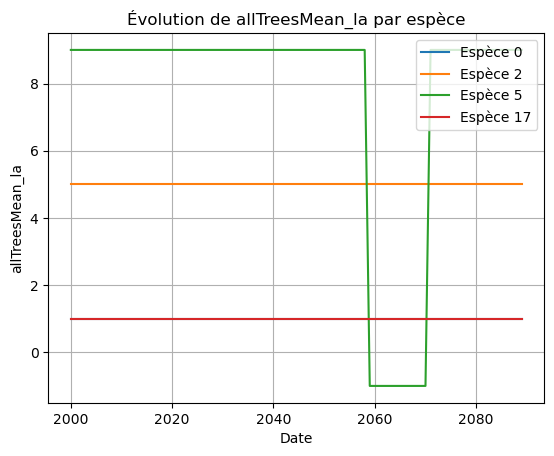

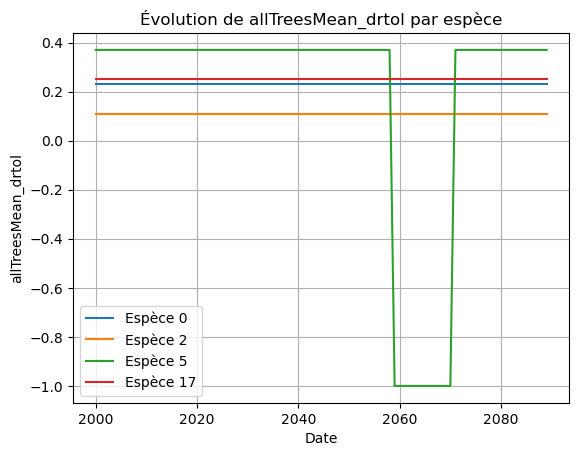

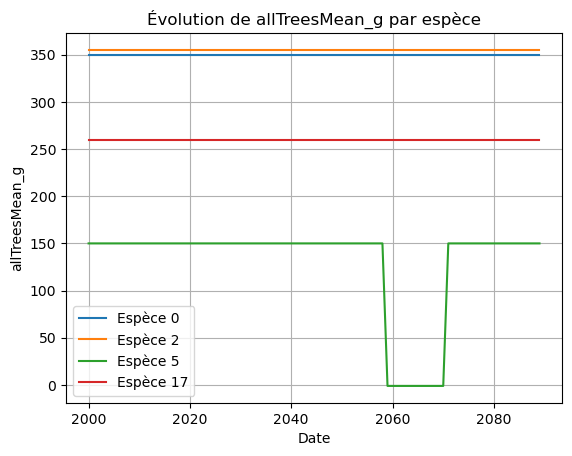

In [21]:

sps = df3["speciesId"].unique()
attributs_name3 = df3.columns.to_list()

for x in attributs_name3[25:28]:
    plt.figure()  # Créer une nouvelle figure pour chaque attribut
    for sp in sps:
        # Filtrer les données pour l'espèce et les dates inférieures à 2024
        data_sp = df3[(df3["speciesId"] == sp) & (df3["#date"] < 2090)]
        # Tracer les données de l'espèce actuelle si elle contient des données
        if not data_sp.empty:
            plt.plot(data_sp["#date"], data_sp[x], label=f'Espèce {sp}')
            plt.grid(True)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.title(f'Évolution de {x} par espèce')
    plt.show() 
    
#espèce 10 et 17 ont la meme moyenne affecté par l'ombre 


# les arbres vivantes et l'influence de l'ombre, la sechresse, et sa croissance

# les arbres établies_ombre_séchresse_croissance

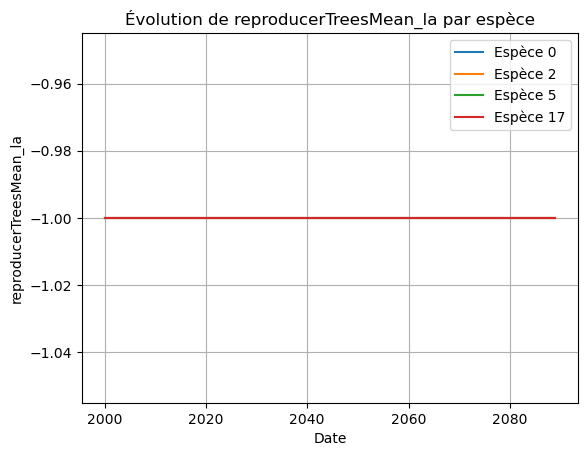

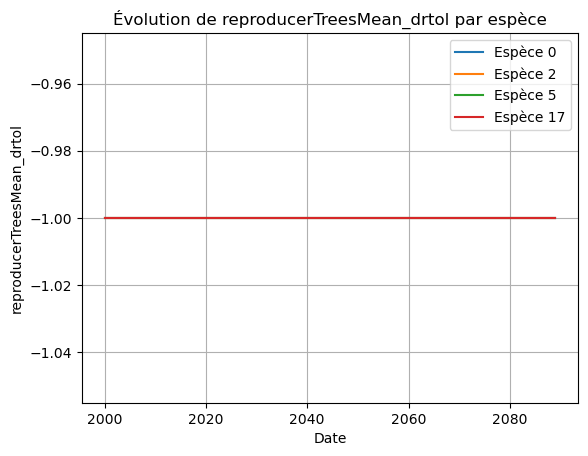

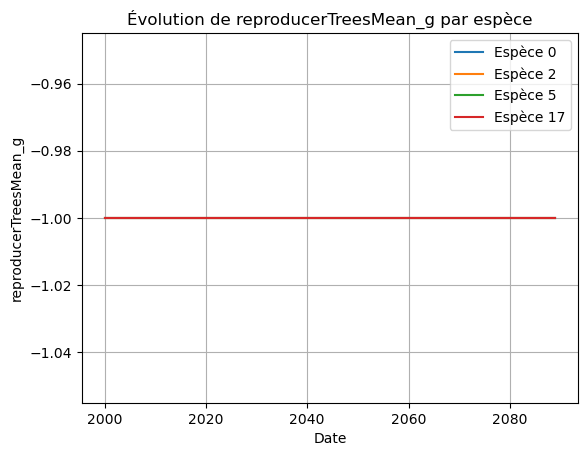

In [22]:

sps = df3["speciesId"].unique()
attributs_name3 = df3.columns.to_list()

for x in attributs_name3[28:31]:
    plt.figure()  # Créer une nouvelle figure pour chaque attribut
    for sp in sps:
        # Filtrer les données pour l'espèce et les dates inférieures à 2024
        data_sp = df3[(df3["speciesId"] == sp) & (df3["#date"] < 2090)]
        # Tracer les données de l'espèce actuelle si elle contient des données
        if not data_sp.empty:
            plt.plot(data_sp["#date"], data_sp[x], label=f'Espèce {sp}')
            plt.grid(True)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.title(f'Évolution de {x} par espèce')
    plt.show() 

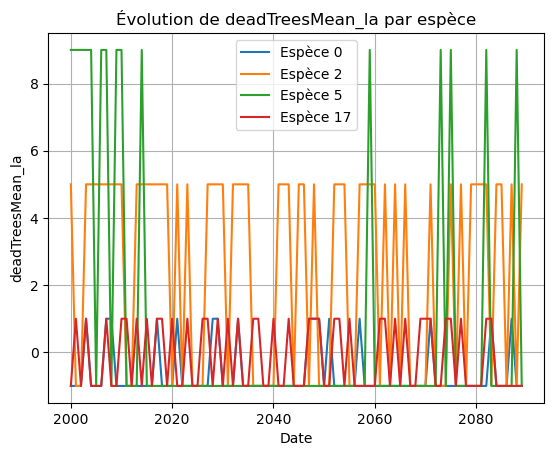

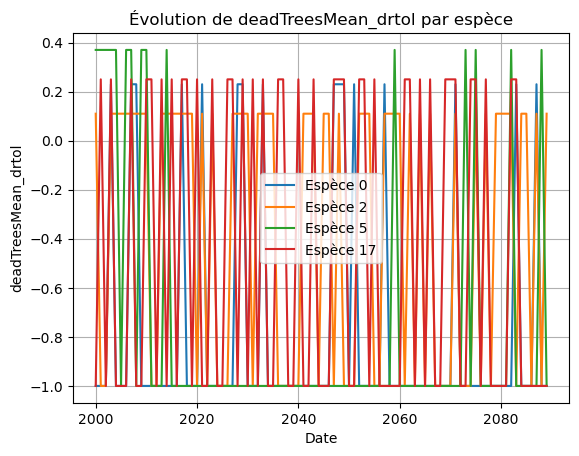

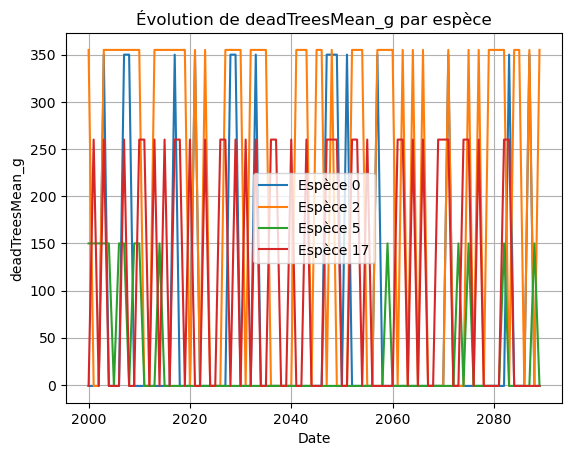

In [23]:
sps = df3["speciesId"].unique()
attributs_name3 = df3.columns.to_list()

for x in attributs_name3[31:]:
    plt.figure()  # Créer une nouvelle figure pour chaque attribut
    for sp in sps:
        # Filtrer les données pour l'espèce et les dates inférieures à 2024
        data_sp = df3[(df3["speciesId"] == sp) & (df3["#date"] < 2090)]
        # Tracer les données de l'espèce actuelle si elle contient des données
        if not data_sp.empty:
            plt.plot(data_sp["#date"], data_sp[x], label=f'Espèce {sp}')
            plt.grid(True)

    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.title(f'Évolution de {x} par espèce')
    plt.show() 

# Tracer_G,N_tree,H,V,L

In [24]:
attributs_name2=df2.columns.to_list()
for x in attributs_name2[1:6]:
    plt.plot(df2["#date"],df2[x])
    plt.title(f'Évolution de {x}au cours du temps')
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.grid(True)
    plt.show()

# Tracer_LAI,DIA,DIS,Tminwinter,DDGa,DDGS

In [25]:
for x in attributs_name2[6:12]:
    plt.plot(df2["#date"],df2[x])
    plt.title(f'Évolution de {x}au cours du temps')
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.grid(True)
    plt.show()

# Tracer_Sm (Soil moisture=Humidité du sol)

In [26]:
attributs_name2[22:]
for x in attributs_name2[22:]:
    plt.plot(df2["#date"],df2[x])
    plt.title(f'Évolution de {x}au cours du temps')
    plt.xlabel('Date')
    plt.ylabel(f'{x}')
    plt.grid(True)
    plt.show()